## Problem: Intersection Plot

Write a function `get_hyperplane(b, bias=0, box=[0,0,1,1])` that computes a hyperplane in 2 dimensions, restricted to a box. More specifically, given input consisting of:

1. a vector $b \in \mathbb{R}^2$
2. a bias term $b_0 \in \mathbb{R}$
3. a box $[l_x, l_y, u_x, u_y]$ — i.e. a rectangle in $\mathbb{R}^2$, specified by a 4-tuple:

$$
[l_x, l_y, u_x, u_y] \leftrightsquigarrow [l_x, u_x] \times [l_y, u_y] = \left\{ \begin{pmatrix} x \\ y \end{pmatrix} \in \mathbb{R}^2 \mid l_x \le x \le u_x \wedge l_y \le y \le u_y  \right\}
$$

Compute the intersection points of the hyperplane $H = \{ x \mid \langle x, b \rangle + b_0 = 0 \}$ with the edges of the box. Return either:

1. Two empty vectors if the intersection is empty
2. Two vectors $X, Y$ of length 2 containing the $x$ and $y$ values of the intersection points.


Test your code by executing:

```python
from numpy.random import randn
from matplotlib import pyplot as plt
box = lx, ly, ux, uy = [-5, -2, 3, 4]
fig, ax  = plt.subplots(figsize=(16, 6))
ax.set_xlim(lx-2, ux+2)
ax.set_ylim(ly-2, uy+2)
ax.plot([lx, lx, ux, ux, lx], [ly, uy, uy, ly, ly], '--k')
for k in range(20):
    X, Y = get_hyperplane(randn(2), bias=randn(1), box=box)
    ax.plot(X, Y)


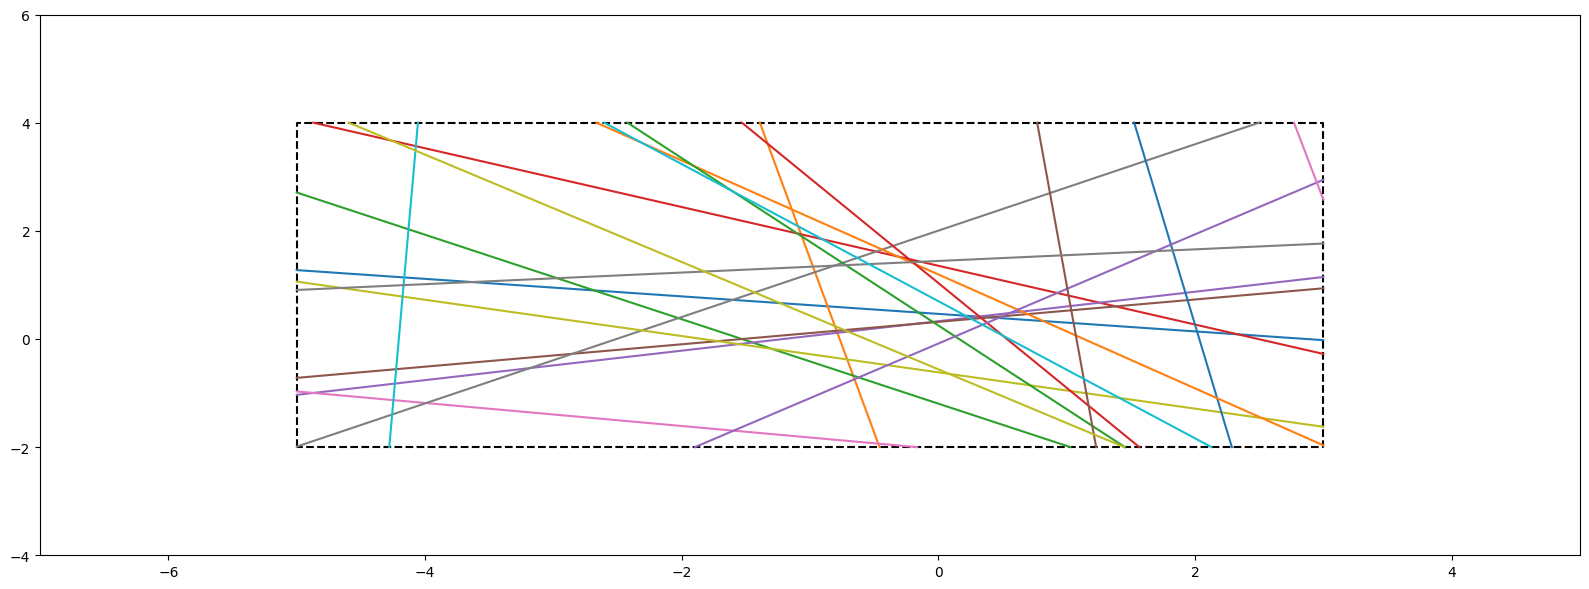

In [1]:
%matplotlib inline
import numpy as np
from numpy.random import randn
from matplotlib  import pyplot as plt

def get_hyperplane(vec, bias=0, box=[0,0,1,1]):
    """
    vec: either vector length 2
    Plot hyperplane in R^2, restricted to given box.
    H = {x| b0 + b1*x1 + b2*x2 = 0 }
    """
    # your code here

    b0= bias[0]
    b1= vec[0]
    b2= vec[1]

    def calc_intersection(x_value=None, y_value=None):
        if x_value is not None:
            y_value = -b1 / b2 * x_value - b0 / b2
            return (x_value, y_value)
        if y_value is not None:
            x_value = -b2 / b1 * y_value - b0 / b1
            return (x_value, y_value)
        return None
    
    intersections = []
    # Check x = lx
    intersections.append(calc_intersection(x_value=box[0]))
    # Check x = ux
    intersections.append(calc_intersection(x_value=box[2]))
    # Check y = ly
    intersections.append(calc_intersection(y_value=box[1]))
    # Check y = uy
    intersections.append(calc_intersection(y_value=box[3]))

    valid = []
    for point in intersections:
        if box[0] <= point[0] <= box[2] and box[1] <= point[1] <= box[3]:
            valid.append(point)

    if len(valid) ==2:
        #[(x1,y1),(x2,y2)] change into [(x1,x2),(y1,y2)]
        valid = [(valid[0][0],valid[1][0]),(valid[0][1],valid[1][1])]
        return valid
    else:
        return [0,0]

# use the code below to validate your plot
box = lx, ly, ux, uy = [-5, -2, 3, 4]
fig, ax  = plt.subplots(figsize=(16, 6))
ax.set_xlim(lx-2, ux+2);
ax.set_ylim(ly-2, uy+2);
ax.plot( [lx, lx, ux, ux, lx], [ly, uy, uy, ly, ly], '--k' )
for k in range(20):
    X, Y = get_hyperplane(randn(2), bias=randn(1), box=box)
    ax.plot(X, Y)
plt.tight_layout()
plt.savefig("lines_in_box.pdf")

If you did everything correct the result should look like the following picture.

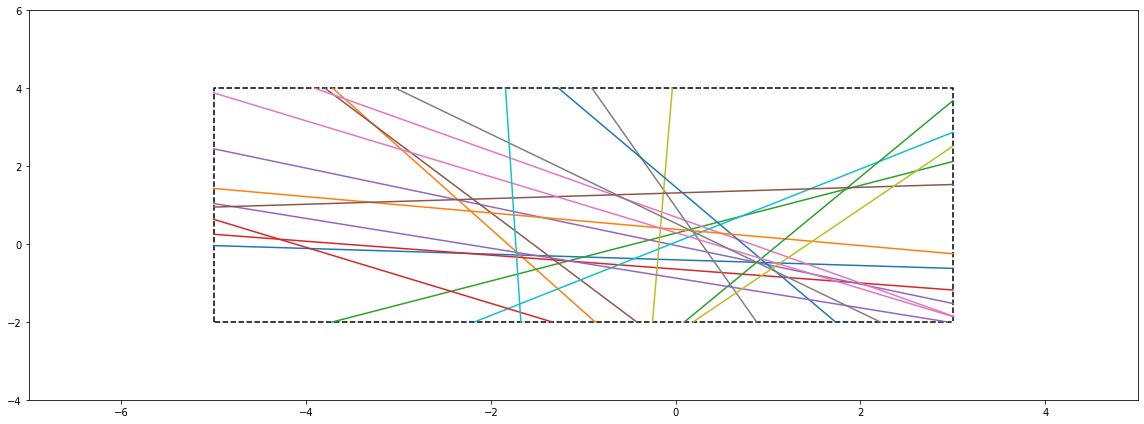

In [1]:
%matplotlib inline
import numpy as np
from numpy.random import randn
from matplotlib  import pyplot as plt

def get_hyperplane(vec, bias=0, box=[0,0,1,1]):
    """
    vec: either vector length 2
    Plot hyperplane in R^2, restricted to given box.
    H = {x| b0 + b1*x1 + b2*x2 = 0 }
    """
    # your code here

# use the code below to validate your plot
box = lx, ly, ux, uy = [-5, -2, 3, 4]
fig, ax  = plt.subplots(figsize=(16, 6))
ax.set_xlim(lx-2, ux+2);
ax.set_ylim(ly-2, uy+2);
ax.plot( [lx, lx, ux, ux, lx], [ly, uy, uy, ly, ly], '--k' )
for k in range(20):
    X, Y = get_hyperplane(randn(2), bias=randn(1), box=box)
    ax.plot(X, Y)
plt.tight_layout()
plt.savefig("lines_in_box.pdf")